In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

In [9]:
file_path = './loan_prediction_datasets.csv'
df = pd.read_csv(file_path)
print(df.columns)

Index(['Gender', 'ApplicantIncome', 'LoanAmount', 'Credit_History',
       'Property_Area', 'Loan_Status'],
      dtype='object')


In [11]:
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df['Property_Area'] = le.fit_transform(df['Property_Area'])
df['Loan_Status'] = le.fit_transform(df['Loan_Status'])

In [13]:
X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5)
}

In [19]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\n{name} Results:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
    print(classification_report(y_test, y_pred))


Logistic Regression Results:
Accuracy: 0.57
              precision    recall  f1-score   support

           0       0.59      0.60      0.60        53
           1       0.54      0.53      0.54        47

    accuracy                           0.57       100
   macro avg       0.57      0.57      0.57       100
weighted avg       0.57      0.57      0.57       100


Random Forest Results:
Accuracy: 0.53
              precision    recall  f1-score   support

           0       0.56      0.55      0.55        53
           1       0.50      0.51      0.51        47

    accuracy                           0.53       100
   macro avg       0.53      0.53      0.53       100
weighted avg       0.53      0.53      0.53       100


KNN Results:
Accuracy: 0.51
              precision    recall  f1-score   support

           0       0.54      0.55      0.54        53
           1       0.48      0.47      0.47        47

    accuracy                           0.51       100
   macro avg   

                 Model  Precision    Recall  F1 Score
0  Logistic Regression   0.543478  0.531915  0.537634
1        Random Forest   0.500000  0.510638  0.505263
2                  KNN   0.478261  0.468085  0.473118


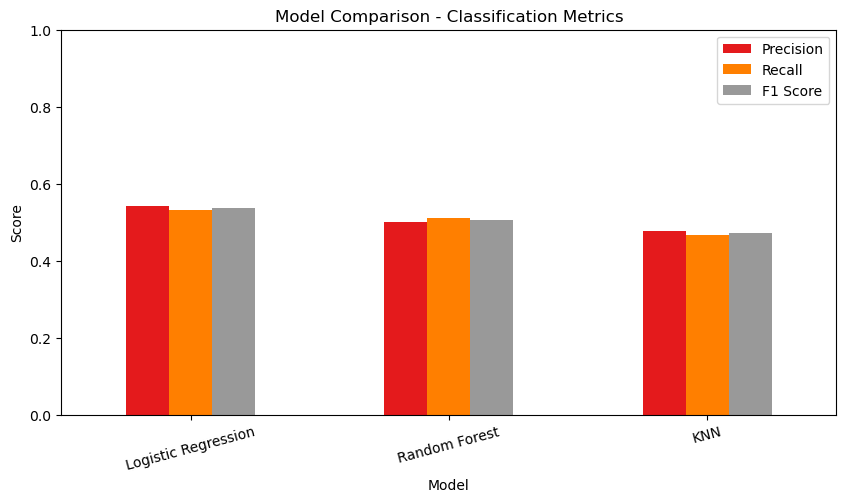

In [51]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Store evaluation metrics
model_metrics = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    model_metrics.append({
        'Model': name,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    })

# Convert to DataFrame for easy visualization
metrics_df = pd.DataFrame(model_metrics)

# Print metrics table
print(metrics_df)

# Plot comparison graph (bar plot for each metric)
metrics_df.set_index('Model', inplace=True)
metrics_df.plot(kind='bar', figsize=(10, 5), ylim=(0, 1), colormap='Set1')

plt.title('Model Comparison - Classification Metrics')
plt.ylabel('Score')
plt.xticks(rotation=15)
plt.legend(loc='upper right')
plt.show()
